In [1]:
# set path to parent file
from pathlib import Path
import os
cwd_path = Path.cwd()
set_path = str(cwd_path.parent)
os.chdir(set_path)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import importlib
import SimulatedAnealing 
importlib.reload(SimulatedAnealing)
SimulatedAnnealing = SimulatedAnealing.SimulatedAnnealing
mpl.rcParams['figure.dpi'] = 300
from rana import rana_func

In [14]:
random_seed = 0
x_length = 5
maximum_markov_chain_length = 50

# Notes
    - seems like the "better" methods don't explore enough at the start
    - step size control makes big difference (clipp and initialisation)
    - fancy temperature annealing doesn't help - need to read literature (maybe coeff of variation type thing would be better?)

# With Cholesky

In [15]:
np.random.seed(random_seed)
x_max = 500
x_min = -x_max
rana_2d_chol = SimulatedAnnealing(x_length=x_length, x_bounds=(x_min, x_max), objective_function=rana_func,
                              pertubation_method = "Cholesky", maximum_archive_length=100, maximum_markov_chain_length=maximum_markov_chain_length,
                                   maximum_function_evaluations=10000)
x_result_chol, objective_result_chol = rana_2d_chol.run()
print(f"x_result = {x_result_chol} \n objective_result = {objective_result_chol} \n "
      f"number of function evaluations = {rana_2d_chol.objective_function_evaluation_count}")

x_result = [ 475.46548905 -239.40264256 -316.23855019   44.39906003   86.76878495] 
 objective_result = -746.5907924203941 
 number of function evaluations = 10007


# With diagonal thing

In [16]:
np.random.seed(random_seed )
x_max = 500
x_min = -x_max   #  annealing_schedule = "adaptive_cooling", 
rana_2d_diag = SimulatedAnnealing(x_length=x_length, x_bounds=(x_min, x_max), objective_function=rana_func,
                              pertubation_method = "Diagonal", maximum_archive_length=100, 
                                  maximum_markov_chain_length=maximum_markov_chain_length,
                                   maximum_function_evaluations=10000)
# annealing_schedule = "adaptive_cooling", 
x_result_diag, objective_result_diag = rana_2d_diag.run()
print(f"x_result = {x_result_diag} \n objective_result = {objective_result_diag} \n "
      f"number of function evaluations = {rana_2d_diag.objective_function_evaluation_count}")

archive_x_diag = np.array([x_archive for x_archive, f_archive in rana_2d_diag.archive])
archive_f_diag = np.array([f_archive for x_archive, f_archive in rana_2d_diag.archive])

x_result = [ 500.         -498.21015619   38.98937918   91.00117547 -500.        ] 
 objective_result = -1261.9359733659776 
 number of function evaluations = 10006


# Simple

In [17]:
np.random.seed(random_seed )
x_max = 500
x_min = -x_max
rana_2d = SimulatedAnnealing(x_length=x_length, x_bounds=(x_min, x_max), objective_function=rana_func,
                             maximum_archive_length=100, maximum_markov_chain_length=maximum_markov_chain_length,
                                   maximum_function_evaluations=10000)
x_result, objective_result = rana_2d.run()
print(f"x_result = {x_result} \n objective_result = {objective_result} \n "
      f"number of function evaluations = {rana_2d.objective_function_evaluation_count}")

archive_x = np.array([x_archive for x_archive, f_archive in rana_2d.archive])
archive_f = np.array([f_archive for x_archive, f_archive in rana_2d.archive])

x_result = [  93.79722826  447.89018727 -500.         -500.         -500.        ] 
 objective_result = -1839.6643317825938 
 number of function evaluations = 10017


# Reults

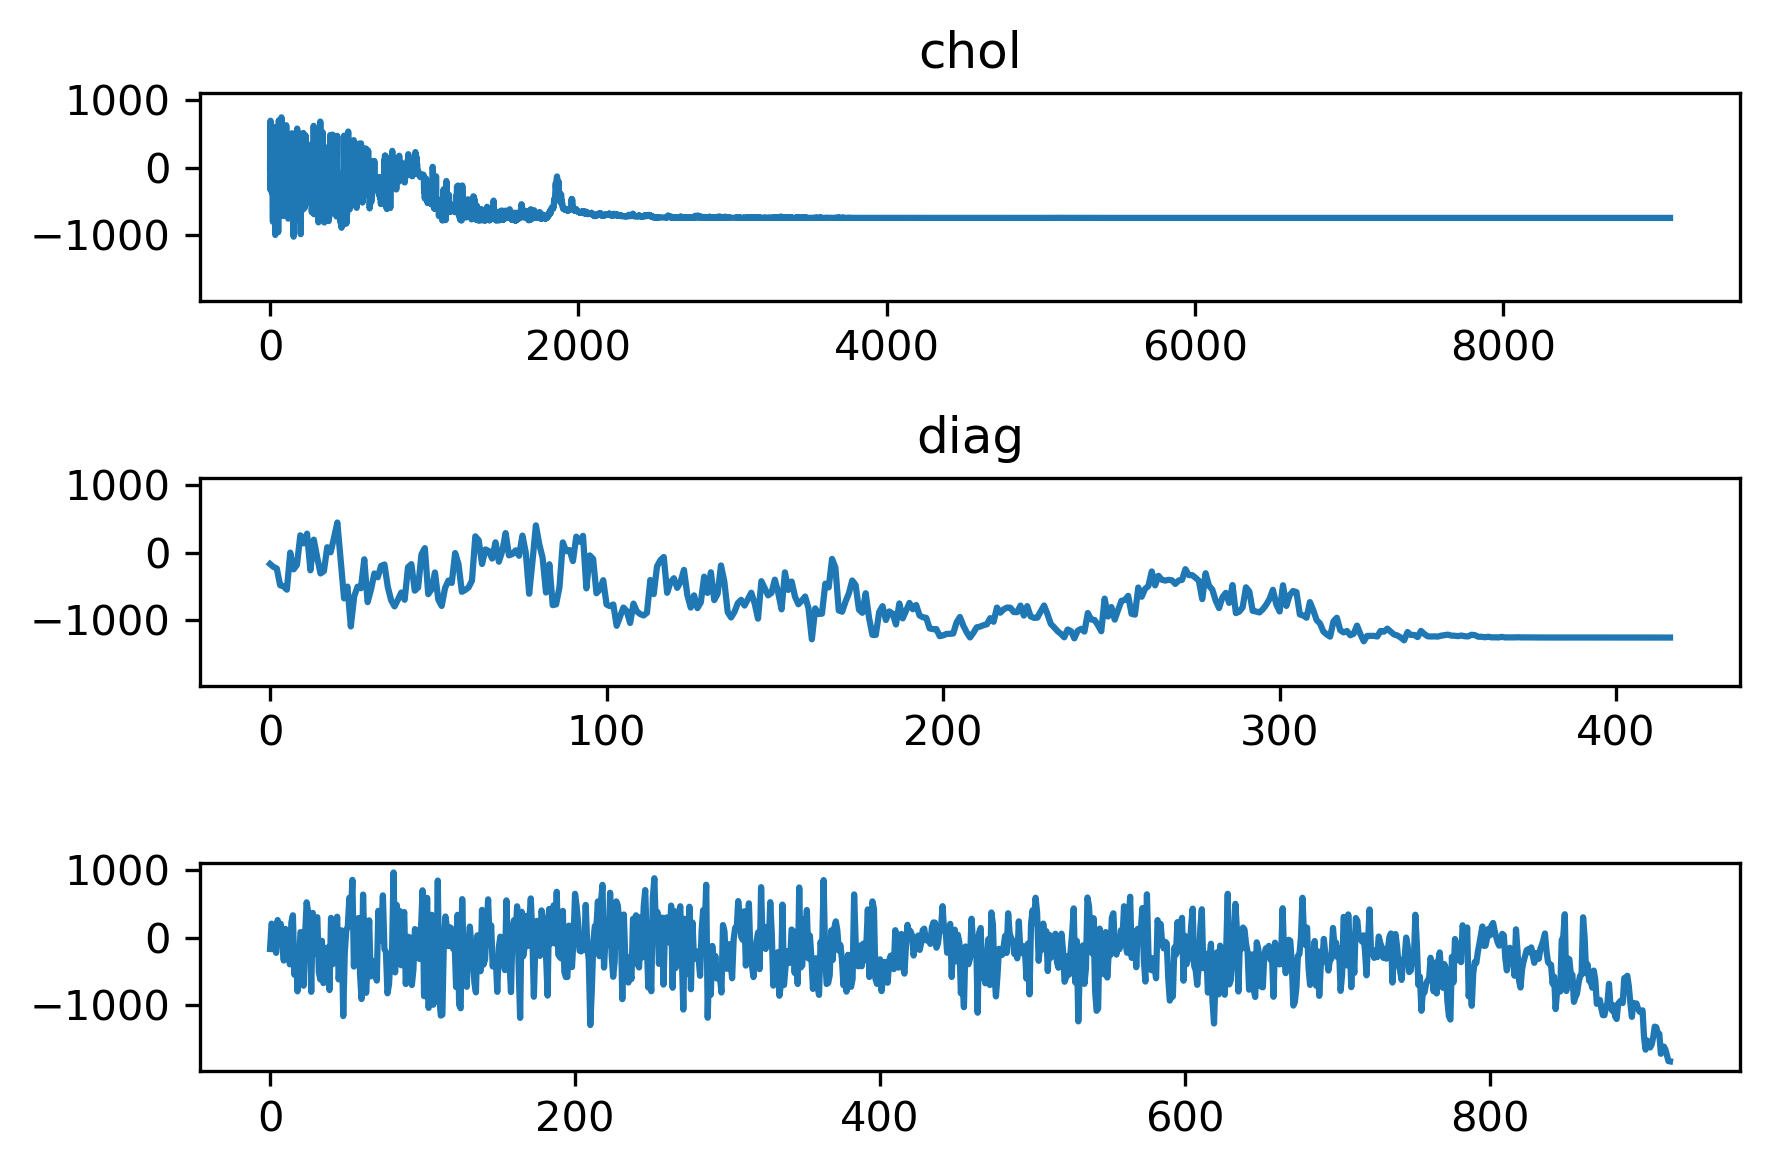

In [18]:
fig, axs = plt.subplots(3, sharey=True)
axs[0].plot(rana_2d_chol.objective_history, label="chol")
axs[1].plot(rana_2d_diag.objective_history, label="diag")
axs[2].plot(rana_2d.objective_history, label="simple")
axs[0].set_title("chol")
axs[1].set_title("diag")
plt.tight_layout()

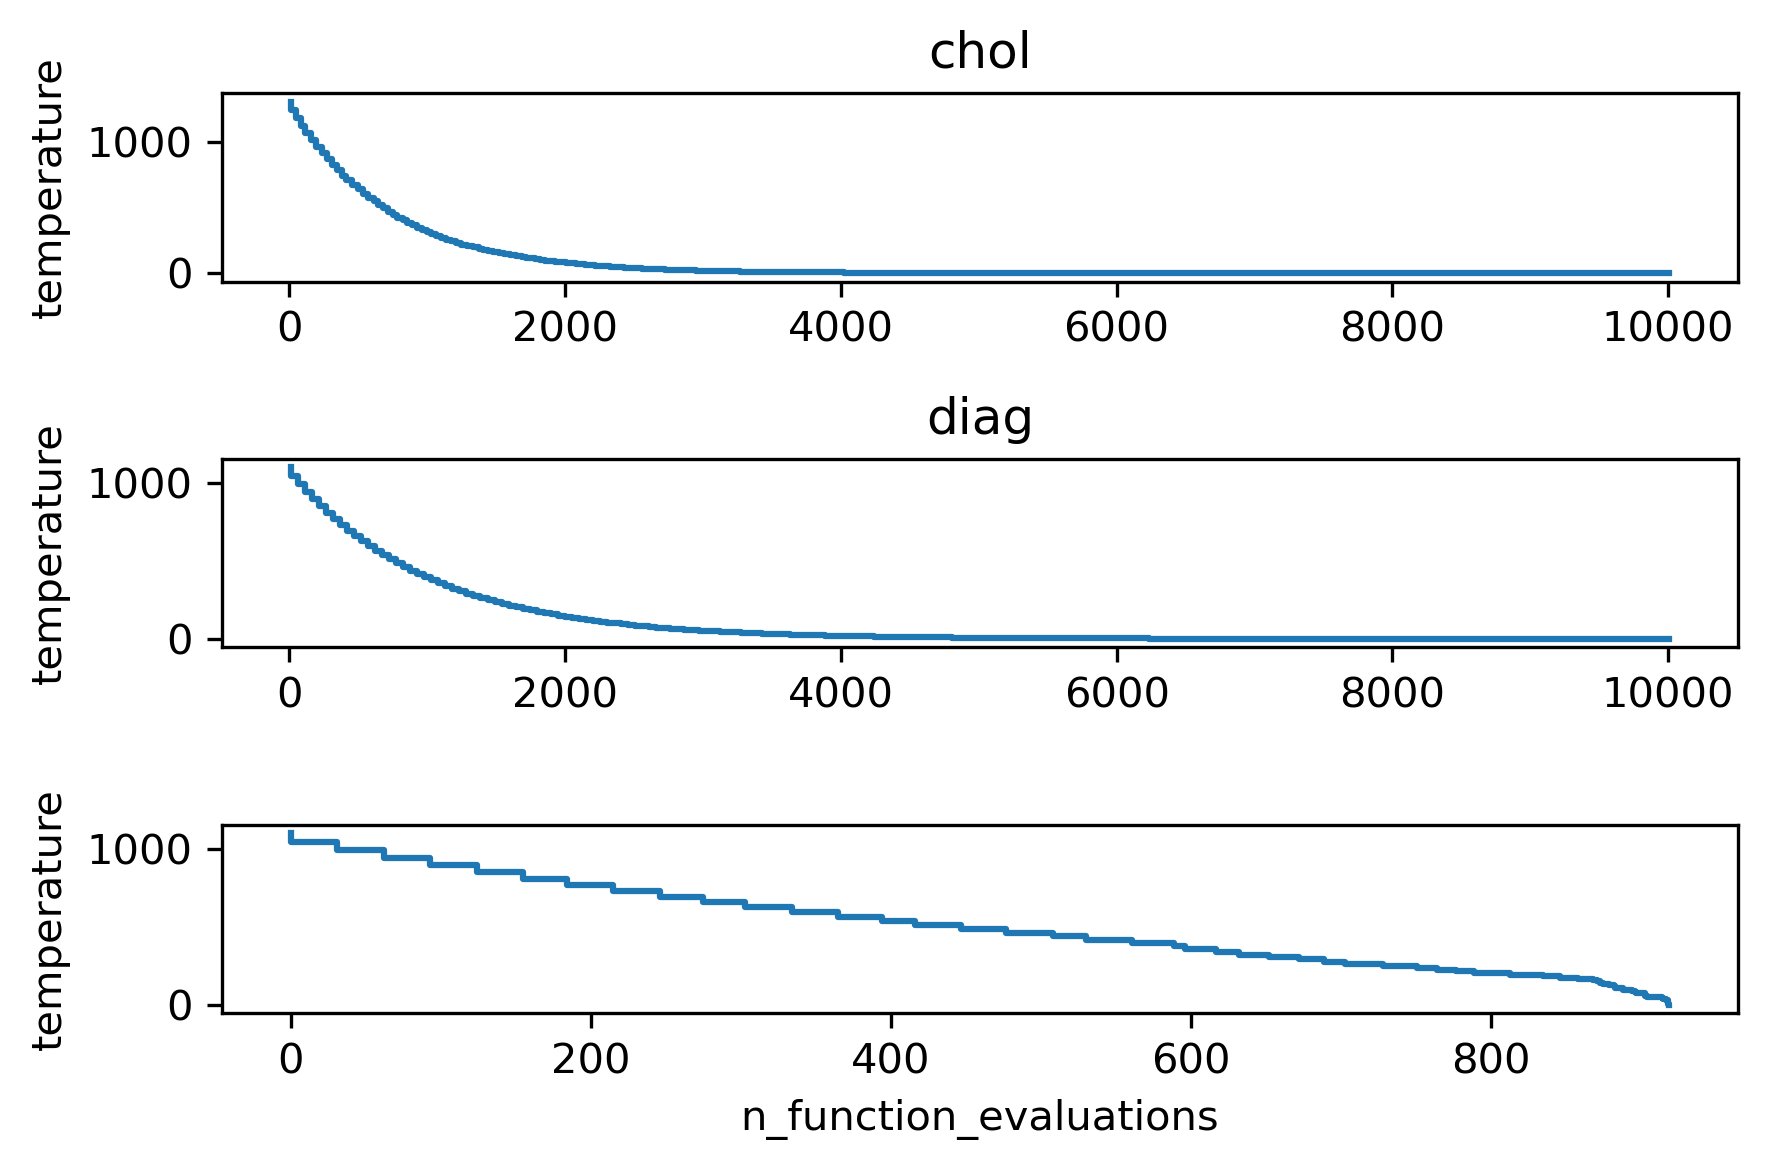

In [19]:
# temperature history
fig, axs = plt.subplots(3)
temp_history_chol = np.array(rana_2d_chol.temperature_history)
axs[0].step(temp_history_chol[:, 2], temp_history_chol[:, 0], label="chol")
temp_history_diag = np.array(rana_2d_diag.temperature_history)
axs[1].step(temp_history_diag[:, 2], temp_history_diag[:, 0], label="diag")
temp_history = np.array(rana_2d.temperature_history)
axs[2].step(temp_history[:, 1], temp_history[:, 0], label="simple")


axs[0].set_title("chol")
axs[1].set_title("diag")
axs[0].set_ylabel("temperature")
axs[1].set_ylabel("temperature")
axs[2].set_ylabel("temperature")
axs[2].set_xlabel("n_function_evaluations")
plt.tight_layout()

Text(112.91666666666667, 0.5, 'probability')

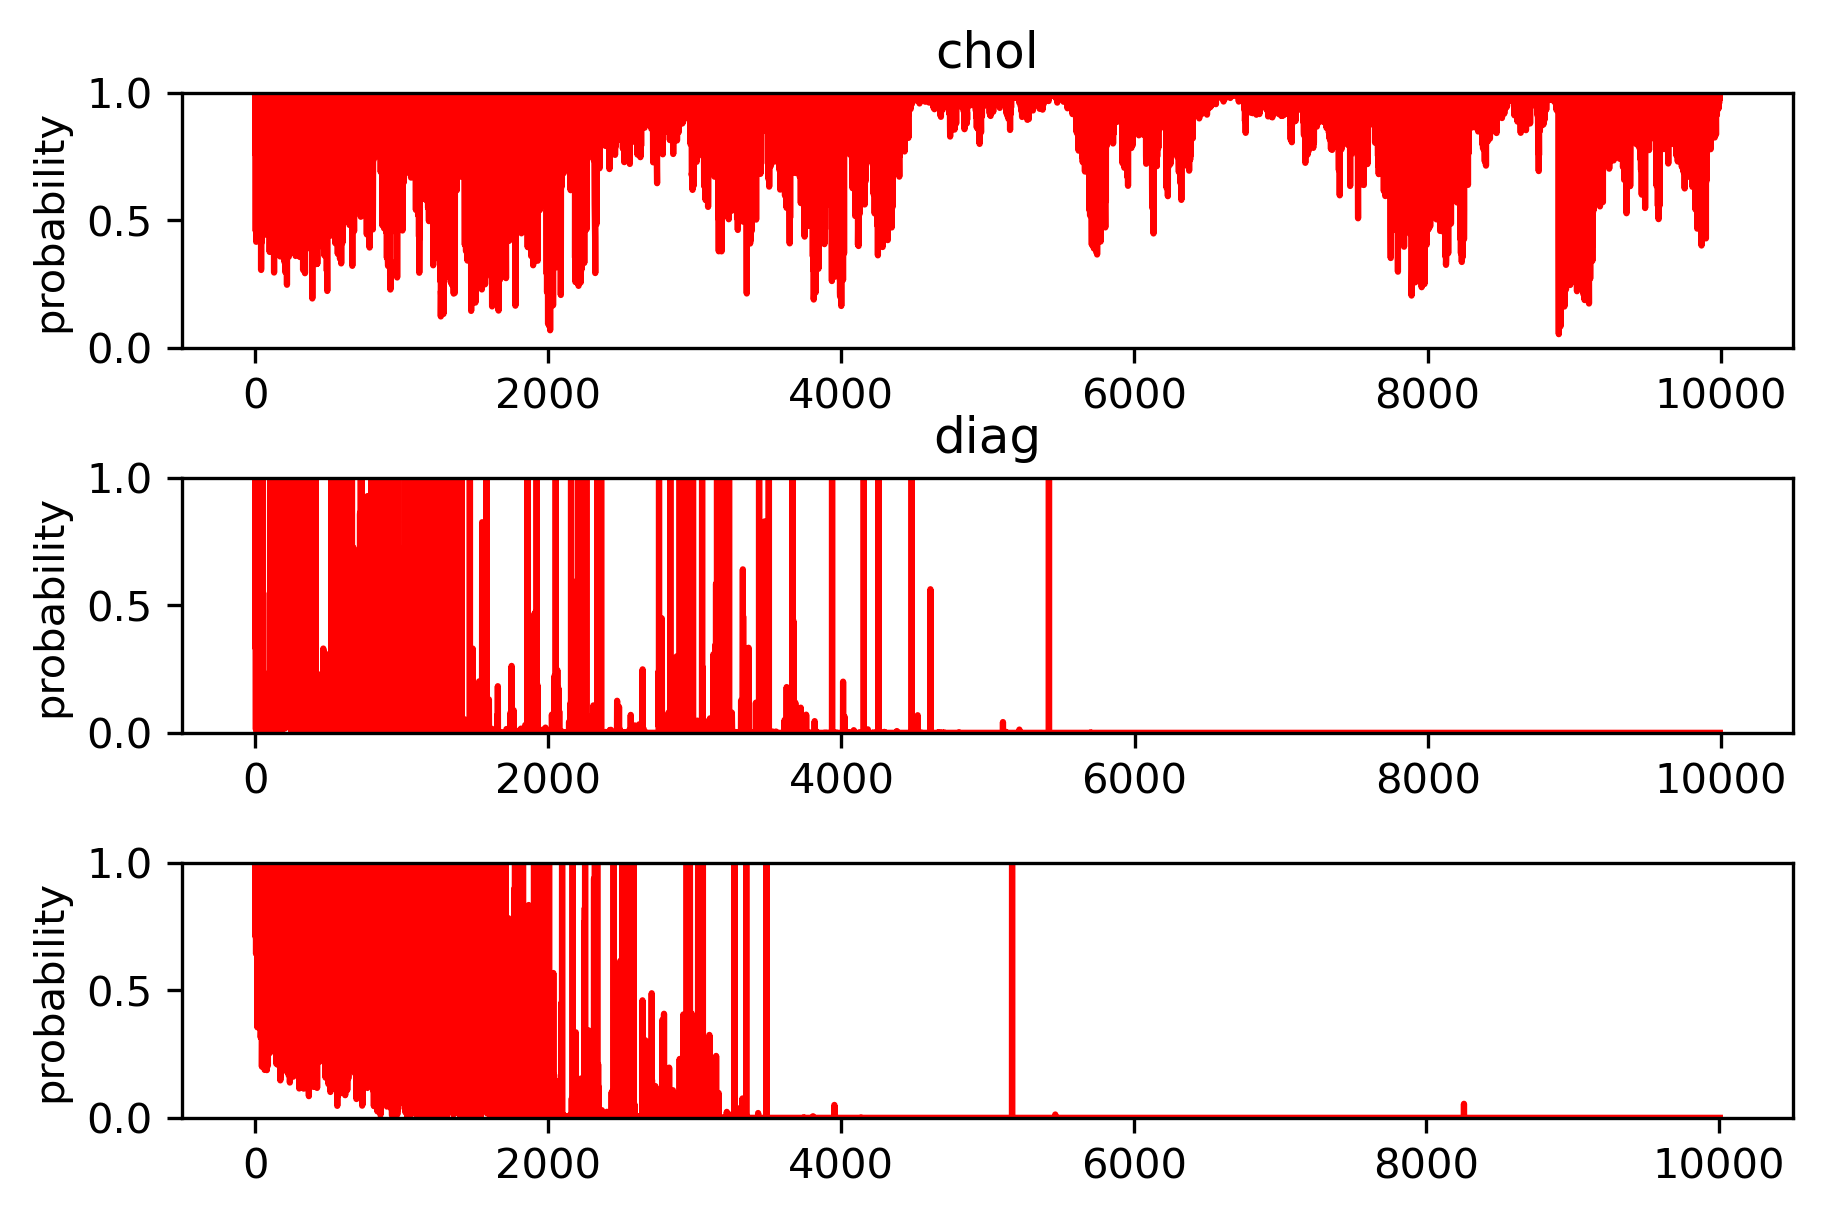

In [20]:
# probability of acceptence
fig, axs = plt.subplots(3)
axs[0].plot(rana_2d_chol.probability_of_acceptance_history, "r", label="chol")
axs[0].set_ylim(0, 1)
axs[1].plot(rana_2d_diag.probability_of_acceptance_history, "r", label="diag")
axs[1].set_ylim(0, 1)
axs[2].plot(rana_2d.probability_of_acceptance_history, "r", label="simple")
axs[2].set_ylim(0, 1)
plt.tight_layout()

axs[0].set_title("chol")
axs[1].set_title("diag")
axs[0].set_ylabel("probability")
axs[1].set_ylabel("probability")
axs[2].set_ylabel("probability")

# Fancy temperature

## With Cholesky

In [22]:
np.random.seed(random_seed)
x_max = 500
x_min = -x_max
rana_2d_chol = SimulatedAnnealing(x_length=x_length, x_bounds=(x_min, x_max), objective_function=rana_func,
                              pertubation_method = "Cholesky",
                             maximum_archive_length=100,annealing_schedule = "adaptive_cooling", maximum_markov_chain_length= maximum_markov_chain_length,
                                   maximum_function_evaluations=10000)
x_result_chol, objective_result_chol = rana_2d_chol.run()
print(f"x_result = {x_result_chol} \n objective_result = {objective_result_chol} \n "
      f"number of function evaluations = {rana_2d_chol.objective_function_evaluation_count}")

x_result = [-314.34968096  229.09622158 -155.31261281 -392.73268071 -363.47985383] 
 objective_result = -1232.8269751826444 
 number of function evaluations = 10037


## With diagonal thing

In [23]:
np.random.seed(random_seed )
x_max = 500
x_min = -x_max   #  , 
rana_2d_diag = SimulatedAnnealing(x_length=x_length, x_bounds=(x_min, x_max), objective_function=rana_func,
                              pertubation_method = "Diagonal", 
                                  maximum_archive_length=100,annealing_schedule = "adaptive_cooling", maximum_markov_chain_length= maximum_markov_chain_length,
                                   maximum_function_evaluations=10000)
# annealing_schedule = "adaptive_cooling", 
x_result_diag, objective_result_diag = rana_2d_diag.run()
print(f"x_result = {x_result_diag} \n objective_result = {objective_result_diag} \n "
      f"number of function evaluations = {rana_2d_diag.objective_function_evaluation_count}")

x_result = [ 105.29355108 -500.         -113.3067752   245.68920213  -75.85974397] 
 objective_result = -1113.9129922270504 
 number of function evaluations = 10007


# Simple

In [25]:
np.random.seed(random_seed )
x_max = 500
x_min = -x_max
rana_2d = SimulatedAnnealing(x_length=x_length, x_bounds=(x_min, x_max), objective_function=rana_func,
                             maximum_archive_length=100,annealing_schedule = "adaptive_cooling", maximum_markov_chain_length= maximum_markov_chain_length,
                                   maximum_function_evaluations=10000)
x_result, objective_result = rana_2d.run()
print(f"x_result = {x_result} \n objective_result = {objective_result} \n "
      f"number of function evaluations = {rana_2d.objective_function_evaluation_count}")

x_result = [ 317.40844358 -424.93618776 -500.         -422.42637473 -220.47973799] 
 objective_result = -1637.98532617899 
 number of function evaluations = 10049


# Reults

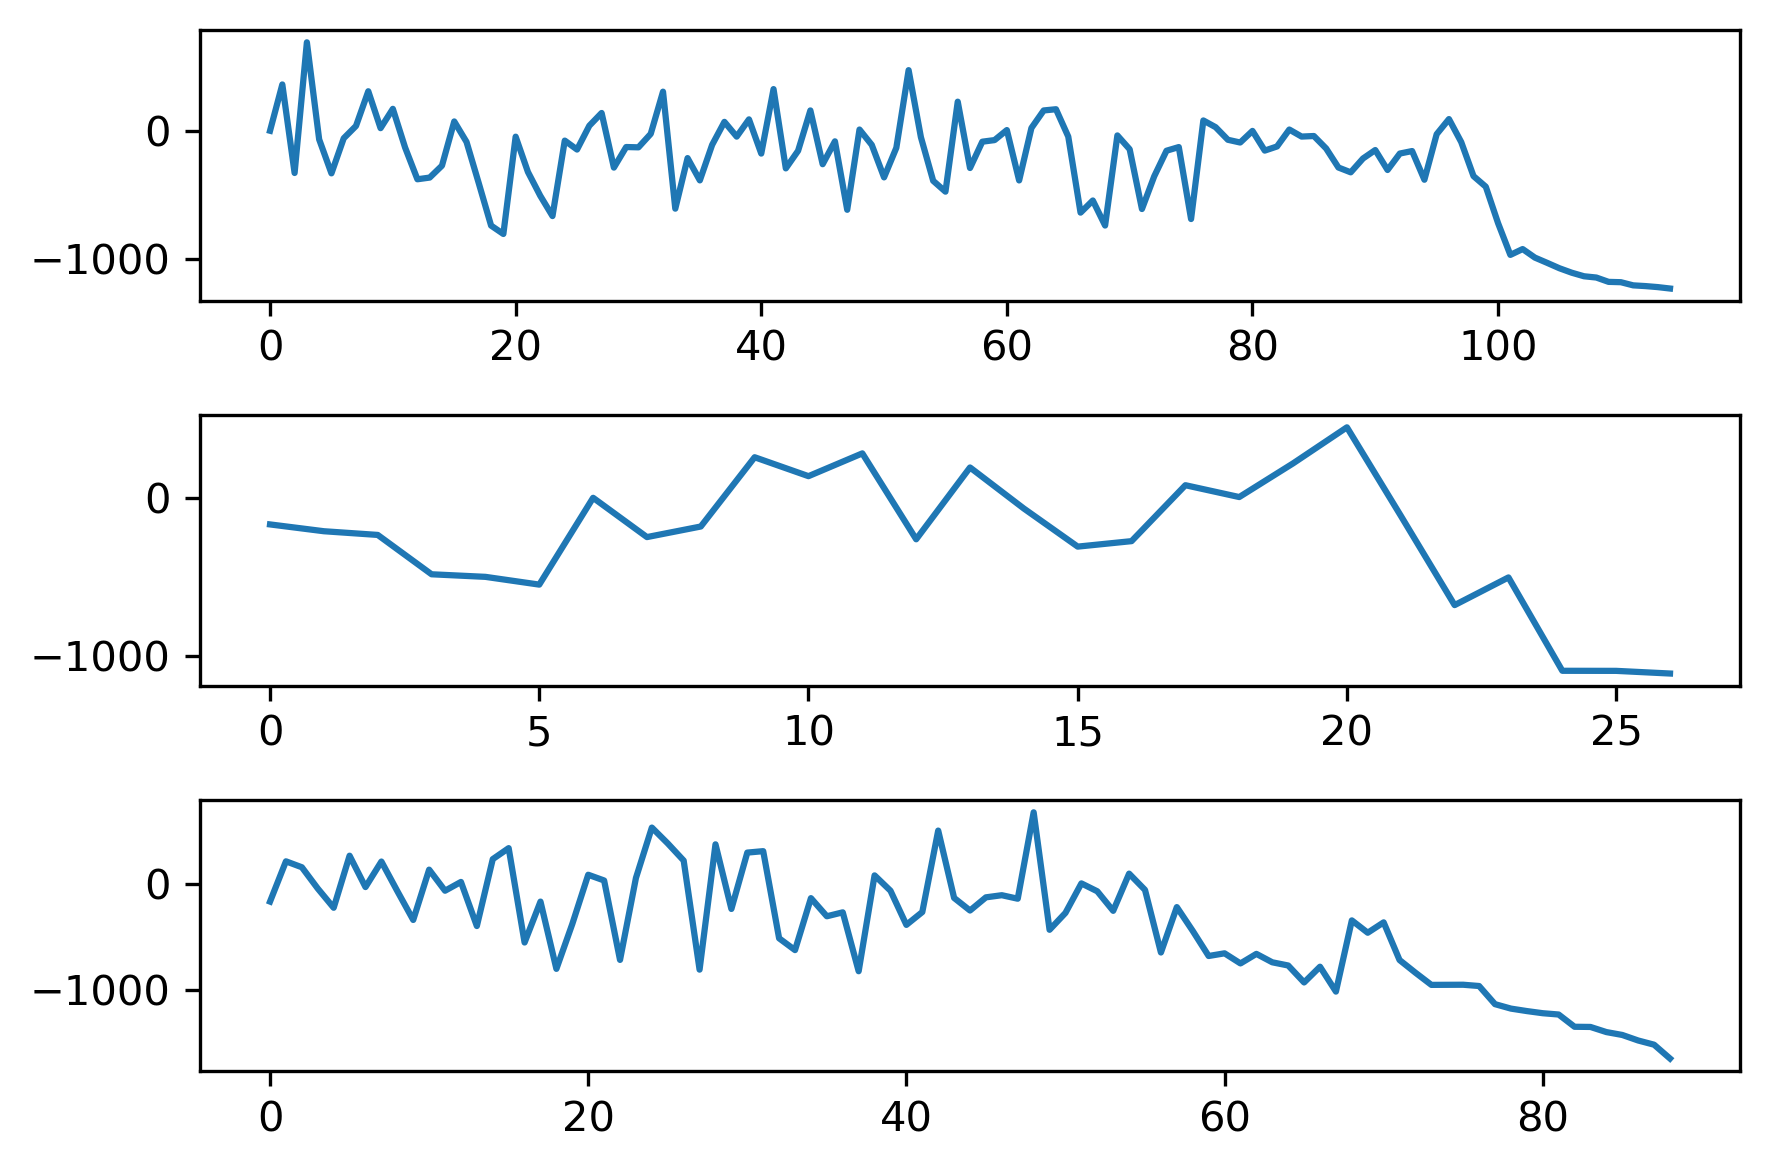

In [26]:
fig, axs = plt.subplots(3)
axs[0].plot(rana_2d_chol.objective_history, label="chol")
axs[1].plot(rana_2d_diag.objective_history, label="diag")
axs[2].plot(rana_2d.objective_history, label="simple")
plt.tight_layout()

Text(0.5, 64.16666666666666, 'n_function_evaluations')

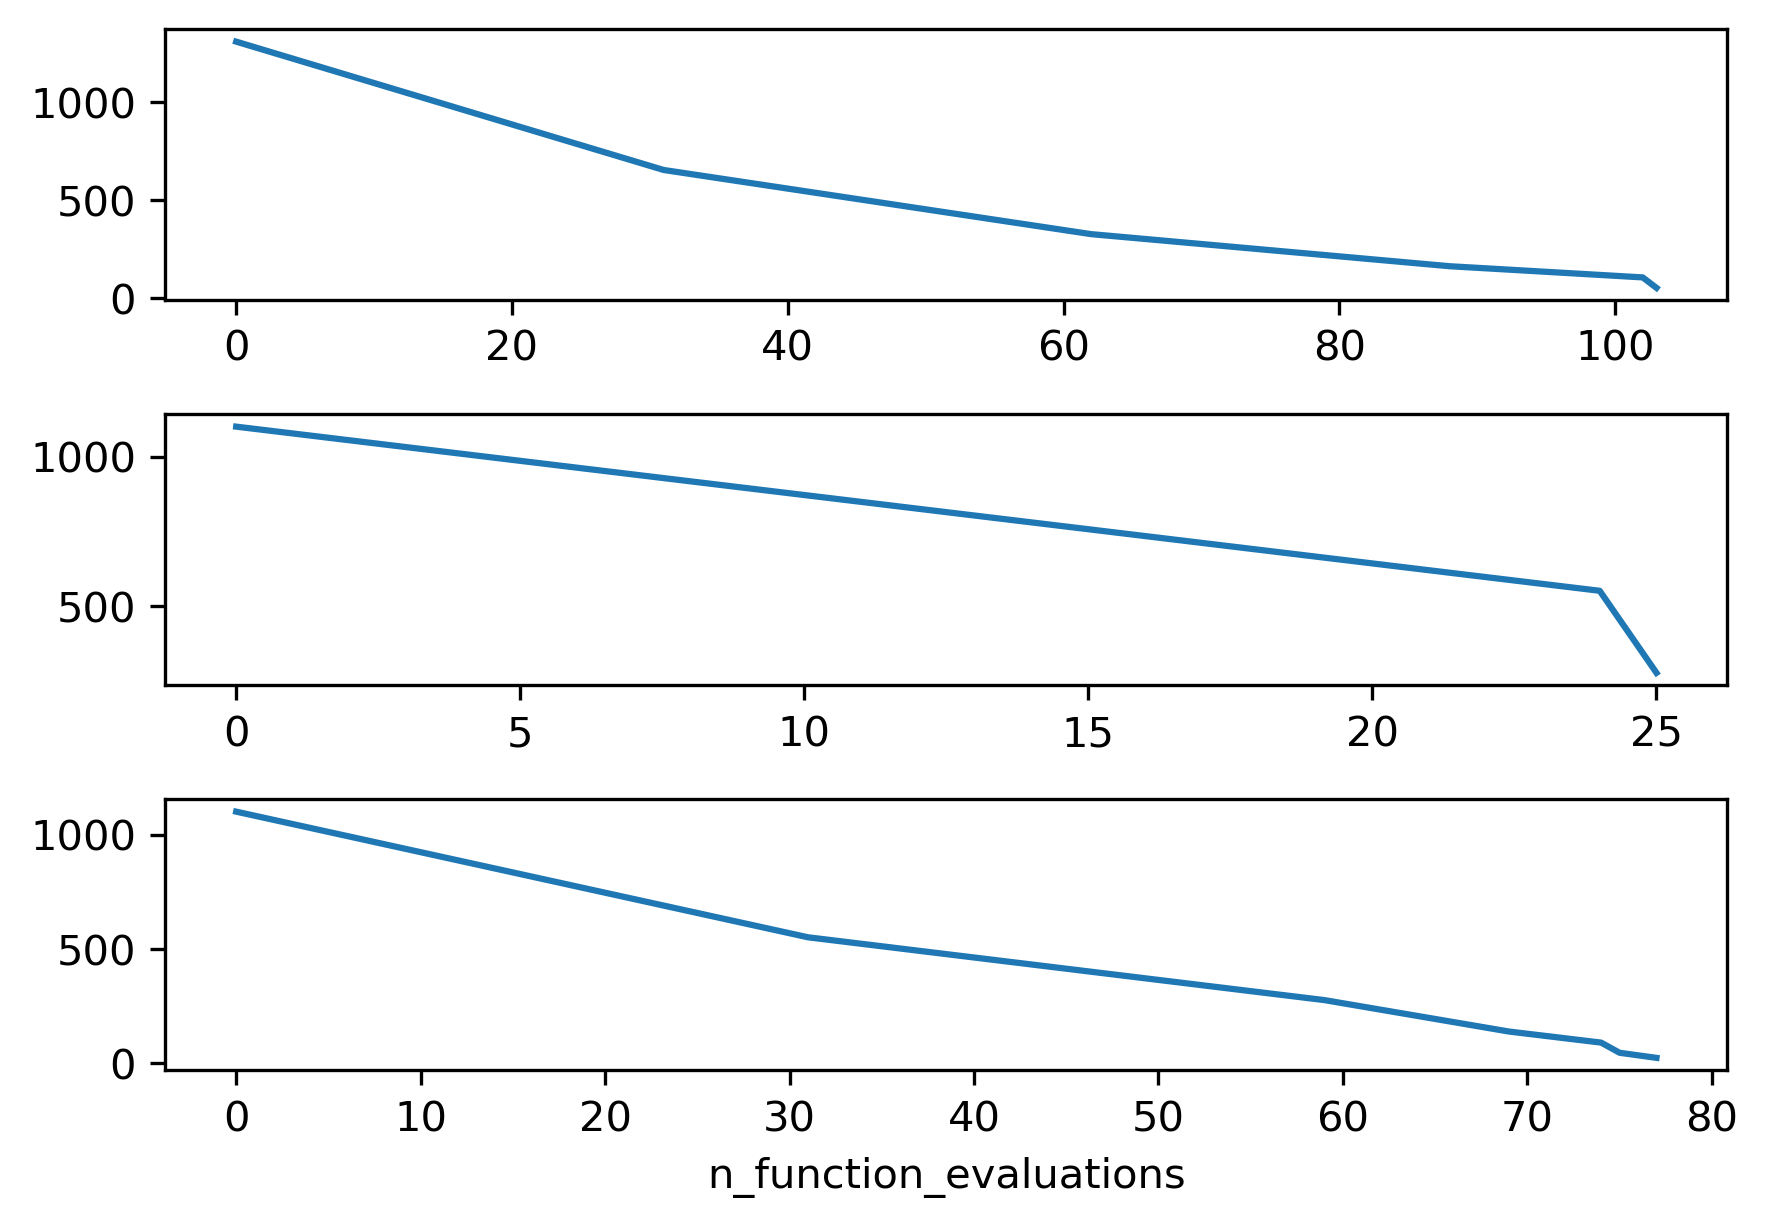

In [27]:
# temperature history
fig, axs = plt.subplots(3)
temp_history_chol = np.array(rana_2d_chol.temperature_history)
axs[0].plot(temp_history_chol[:, 1], temp_history_chol[:, 0], label="chol")
temp_history_diag = np.array(rana_2d_diag.temperature_history)
axs[1].plot(temp_history_diag[:, 1], temp_history_diag[:, 0], label="diag")
temp_history = np.array(rana_2d.temperature_history)
axs[2].plot(temp_history[:, 1], temp_history[:, 0], label="simple")
plt.tight_layout()
axs[2].set_xlabel("n_function_evaluations")

(0.0, 1.0)

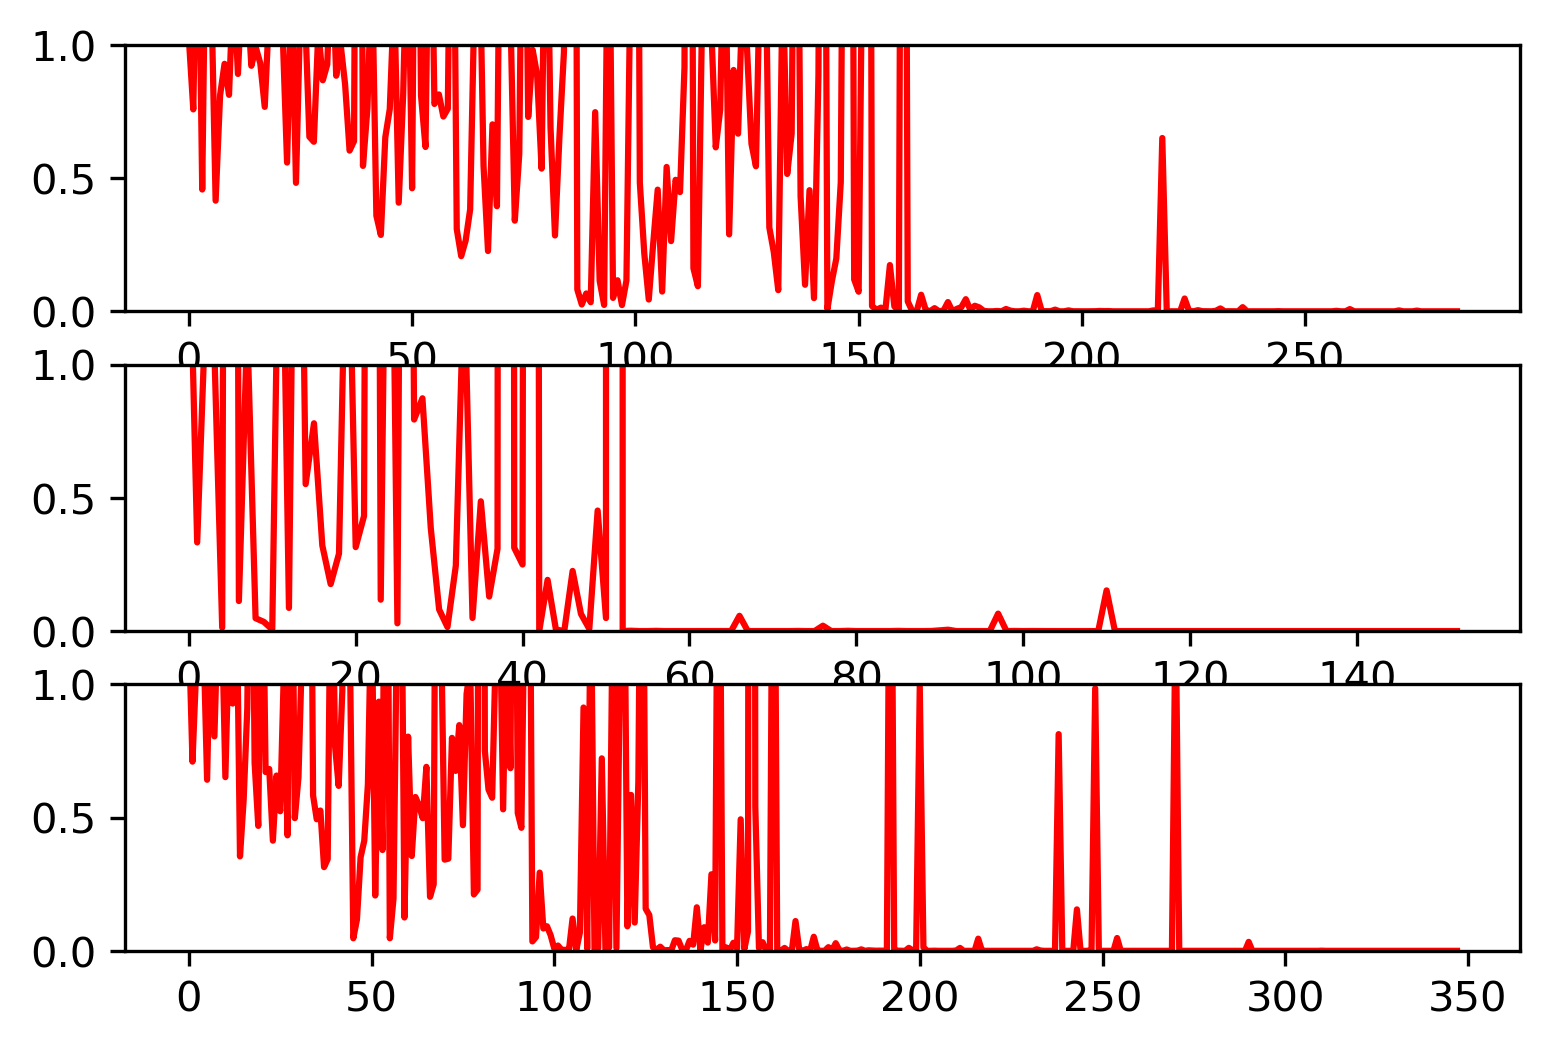

In [28]:
# probability of acceptence
fig, axs = plt.subplots(3)
axs[0].plot(rana_2d_chol.probability_of_acceptance_history, "r", label="chol")
axs[0].set_ylim(0, 1)
axs[1].plot(rana_2d_diag.probability_of_acceptance_history, "r", label="diag")
axs[1].set_ylim(0, 1)
axs[2].plot(rana_2d.probability_of_acceptance_history, "r", label="simple")
axs[2].set_ylim(0, 1)

# old

In [ ]:
fig, ax = plt.subplots(1)
temp_history_chol = np.array(rana_2d_chol.temperature_history)
ax.plot(temp_history_chol[:, 1], temp_history_chol[:, 0])

In [ ]:
plt.plot(rana_2d_chol.probability_of_acceptance_history, "r")
plt.ylim(0, 1)

In [ ]:
plt.plot(rana_2d_chol.objective_history)

# Diag

In [ ]:
fig, ax = plt.subplots(1)
temp_history = np.array(rana_2d_diag.temperature_history)
ax.plot(temp_history[:, 1], temp_history[:, 0])

In [ ]:
plt.plot(rana_2d_diag.probability_of_acceptance_history, "r")
plt.ylim(0, 1)

In [ ]:
plt.plot(rana_2d_diag.objective_history)

# Without any fancy step size stuff

In [ ]:
fig, ax = plt.subplots(1)
temp_history = np.array(rana_2d.temperature_history)
ax.plot(temp_history[:, 1], temp_history[:, 0])

In [ ]:
plt.plot(rana_2d.probability_of_acceptance_history, "r")
plt.ylim(0, 1)

In [ ]:
plt.plot(rana_2d.objective_history)